# EDA part 2 Studio

## Further Analysis of IMDB movies

In this studio, we're returning to this [tutorial](https://towardsdatascience.com/understand-the-data-with-univariate-and-multivariate-charts-and-plots-in-python-3b9fcd68cd8) as a reference guide for our EDA.
You've seen the data set before and you've worked through similar kinds of questions with the heart disease dataset. 

Blocks have been created for your code and we've asked you to add more in some places.

The dataset from [Kaggle](https://www.kaggle.com/PromptCloudHQ/imdb-data)

### 1. Find the relative proportions of movie genres represented.

In [3]:
# import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create your data variabe using .read_csv 
 
data = pd.read_csv("IMDB-Movie-Data.csv")


# get reaquainted with the data by viewing the first 5 rows

print(data.head())

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

In [6]:
# list the column names

print(data.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


In [7]:
# preview the contents of the 'Genre' column only
print(data["Genre"])

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object


In [9]:
# using the .value_counts() method, explore the number of each genre type in the series
# assign the result to a variable called genre_counts

genre_counts = data["Genre"].value_counts()
print(genre_counts)

Genre
Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: count, Length: 207, dtype: int64


In [17]:
# Find the proportions of each genre by dividing your variable assigned above by the sum of 
# all of the unique genre values
# assign this to the variable genre_proportions

total_genre = data["Genre"].count()
# print(total_genre)
proportion = genre_counts / total_genre
# print(f"{proportion * 100}")

for genre, perc in proportion.items():
    print(f"{genre}: {perc:.2f}%")

Action,Adventure,Sci-Fi: 0.05%
Drama: 0.05%
Comedy,Drama,Romance: 0.04%
Comedy: 0.03%
Drama,Romance: 0.03%
Animation,Adventure,Comedy: 0.03%
Action,Adventure,Fantasy: 0.03%
Comedy,Drama: 0.03%
Comedy,Romance: 0.03%
Crime,Drama,Thriller: 0.02%
Crime,Drama,Mystery: 0.02%
Action,Adventure,Drama: 0.02%
Action,Crime,Drama: 0.02%
Horror,Thriller: 0.02%
Drama,Thriller: 0.01%
Adventure,Family,Fantasy: 0.01%
Biography,Drama,History: 0.01%
Action,Adventure,Comedy: 0.01%
Biography,Drama: 0.01%
Action,Comedy,Crime: 0.01%
Action,Crime,Thriller: 0.01%
Action,Adventure,Thriller: 0.01%
Horror: 0.01%
Crime,Drama: 0.01%
Biography,Crime,Drama: 0.01%
Thriller: 0.01%
Horror,Mystery,Thriller: 0.01%
Action,Thriller: 0.01%
Animation,Action,Adventure: 0.01%
Biography,Drama,Sport: 0.01%
Adventure,Comedy,Drama: 0.01%
Drama,Mystery,Thriller: 0.01%
Action,Biography,Drama: 0.01%
Mystery,Thriller: 0.01%
Biography,Comedy,Drama: 0.01%
Comedy,Crime,Drama: 0.01%
Action,Drama,Thriller: 0.01%
Action,Sci-Fi,Thriller: 0.01%

In [19]:
# the length of results a above is too long to know if there are any null values present
# we can run .isna() on the series and collect the sum to check if there are missing values
# uncomment the line below to see the results
print(data['Genre'].isna().sum())


0


In [22]:
# use .head() on genre_proportions to get a better look at the top 20 
# remember: .head() can take a parameter to display more than 5 entries 
print(proportion.head(20))

Genre
Action,Adventure,Sci-Fi       0.050
Drama                         0.048
Comedy,Drama,Romance          0.035
Comedy                        0.032
Drama,Romance                 0.031
Animation,Adventure,Comedy    0.027
Action,Adventure,Fantasy      0.027
Comedy,Drama                  0.027
Comedy,Romance                0.026
Crime,Drama,Thriller          0.024
Crime,Drama,Mystery           0.023
Action,Adventure,Drama        0.018
Action,Crime,Drama            0.017
Horror,Thriller               0.016
Drama,Thriller                0.015
Adventure,Family,Fantasy      0.014
Biography,Drama,History       0.014
Action,Adventure,Comedy       0.014
Biography,Drama               0.014
Action,Comedy,Crime           0.012
Name: count, dtype: float64


### 2. Find the minimum, maximum, average, and standard deviation of revenue data.

In [30]:
# use .describe() on the revenue column to see some summary statistics of the revenue data present
print(data.head())
rev = data["Revenue (Millions)"]
rev.describe()

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64

Do we have any missing revenue entries?
Add a new code cell below this and use ``.isna()`` on the column to check.
Ask yourself: does this affect the results of ``.describe()``?
Hint: look at the count result above and compare that with the ``Length`` returned with ``.isna()``

In [36]:
rev.isna().value_counts()


Revenue (Millions)
False    872
True     128
Name: count, dtype: int64

### 3. Make a plot distribution of the revenue data.


count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64


C:\Users\kyler\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Revenue (Millions)', ylabel='Count'>

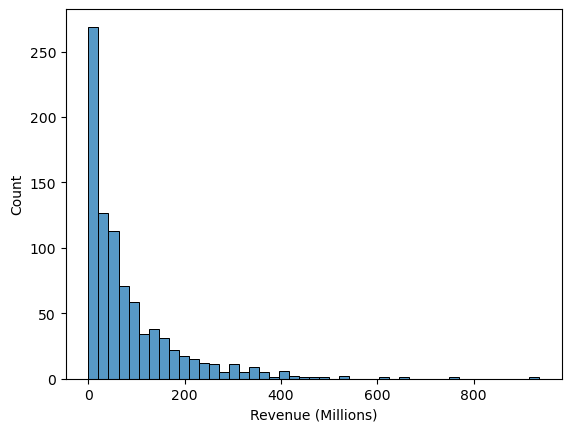

In [49]:
# use sns.histplot to get a birds eye view of the revenue distribution
# Note: the refernce article plots Cholesterol data with ``distplot`` but we recieve 
# a deprecation warning so we've switched it with ``histplot``. The resulting graph is 
# virtually the same.

print(rev.describe())
sns.histplot(rev)


Look back at your ``.describe()`` results above. Does this plotted distribution match the results of the 25%, 50%, and 75% percentile data?

Create another code cell below this and make another histplot but with only the top 20 items in the revenue column. Run ``.describe()`` on the top 20 to again check the percentile distributions with what the graph displays.

50     936.63
87     760.51
85     652.18
76     623.28
54     533.32
12     532.17
119    486.29
94     458.99
124    448.13
578    424.65
78     423.03
688    414.98
279    408.99
35     408.08
151    408.00
710    402.08
174    400.74
114    380.96
15     368.31
797    368.05
Name: Revenue (Millions), dtype: float64
count     20.000000
mean     491.968500
std      147.732725
min      368.050000
25%      406.520000
50%      423.840000
75%      532.457500
max      936.630000
Name: Revenue (Millions), dtype: float64


C:\Users\kyler\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


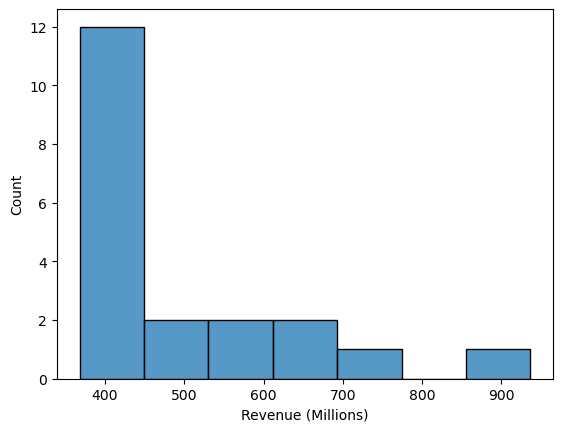

In [57]:
top_20 = rev.sort_values(ascending=False).head(20)
print(top_20)
sns.histplot(top_20)
print(top_20.describe())

### 4. Find the % of movies with a higher than avergage Rating

In [62]:
# create a variable called mean_rating.
# assign mean_rating the result of running ``.mean()`` on the rating column.

rating_mean = data["Rating"].mean()
print(rating_mean)

6.723199999999999


In [76]:
# Find the dataset where a movie's rating is higher than mean_rating. 

high_rating_movies = data[data["Rating"] > rating_mean]

# Divide that by the length of the total dataset.

count_hr = len(high_rating_movies)
count_r = len(data["Rating"])

print(f"{(count_hr /  count_r )* 100 }%")



51.300000000000004%


### 5. Plot the rating data against genre to observe the difference in score in different movie types

In [89]:
# run describe on the rating column

rating = data["Rating"]

rating.describe()


count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

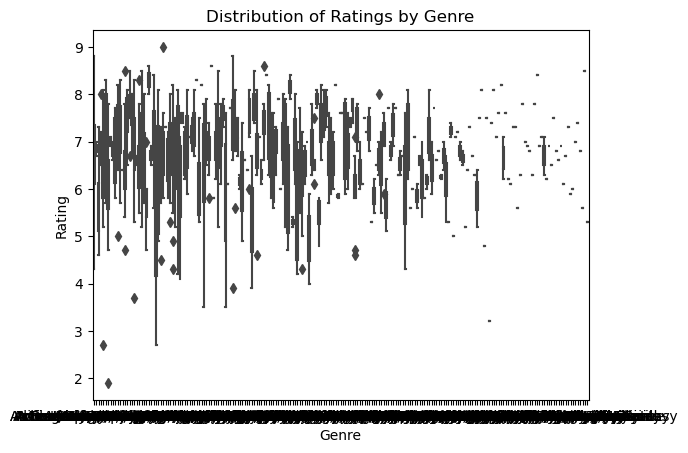

In [90]:
# Plot the rating data against genres
# First, lets mirror what our reference article plots

sns.boxplot(x="Genre", y="Rating", data=data)
plt.title("Distribution of Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()



That graph isn't very helpful! 
Create a new code cell below this and create the same plot, but this time for data used,
use only the first 20 entries.
Do you find that any easier to read and interpret?
Next, create one more cell. Use the same axes and the top 20 items in the data, but plot using ``sns.scatterplot()``. Do you learn anything different between the boxplot and the scatterplot?

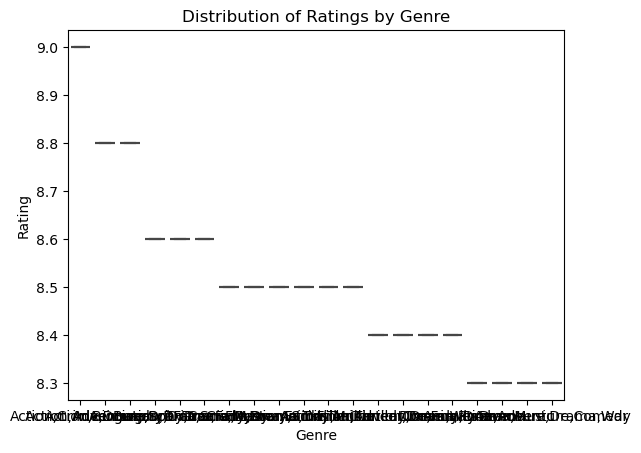

In [92]:
first_20 = data.sort_values(by="Rating", ascending=False).head(20)
sns.boxplot(x="Genre", y="Rating", data=first_20)
plt.title("Distribution of Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()


C:\Users\kyler\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kyler\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


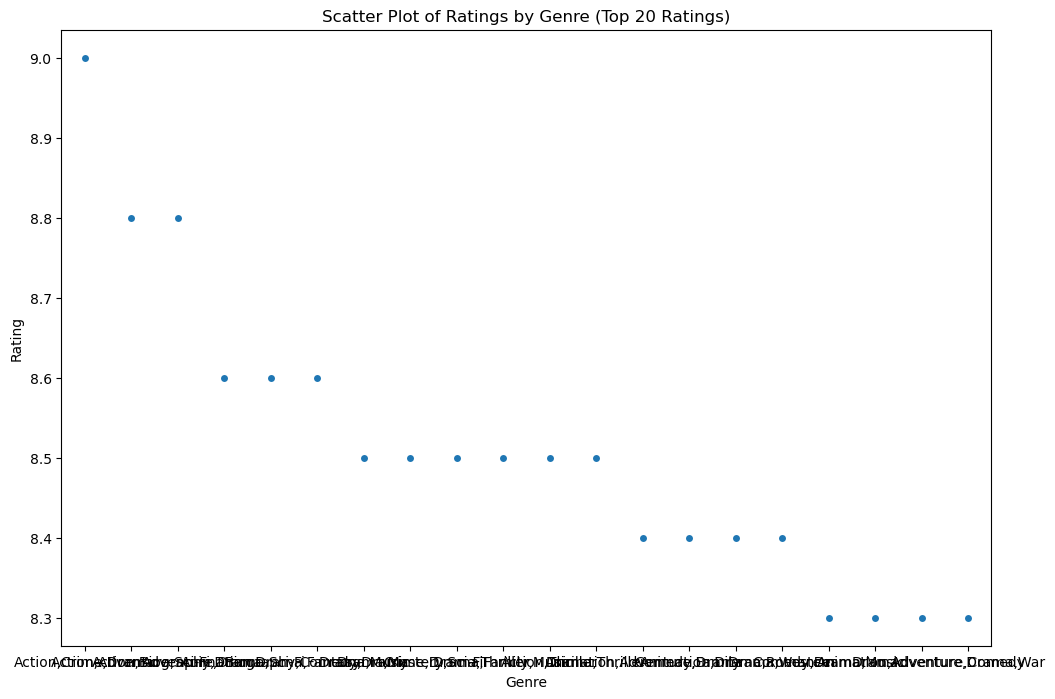

In [96]:
plt.figure(figsize=(12, 8))

# Using Seaborn's scatter plot with jitter for categorical variables
sns.stripplot(x="Genre", y="Rating", data=first_20, jitter=True)

plt.title("Scatter Plot of Ratings by Genre (Top 20 Ratings)")
plt.xlabel("Genre")
plt.ylabel("Rating")

plt.show()

In [114]:

genre_avg_ratings = data.groupby("Genre")["Rating"].mean().reset_index()

# Print the average rating for each genre
for idx, row in genre_avg_ratings.iterrows():
    print(f"Genre: {row['Genre']}, Average Rating: {row['Rating']:.2f}")

Genre: Action, Average Rating: 6.15
Genre: Action,Adventure, Average Rating: 6.40
Genre: Action,Adventure,Biography, Average Rating: 7.00
Genre: Action,Adventure,Comedy, Average Rating: 6.59
Genre: Action,Adventure,Crime, Average Rating: 6.43
Genre: Action,Adventure,Drama, Average Rating: 6.54
Genre: Action,Adventure,Family, Average Rating: 5.58
Genre: Action,Adventure,Fantasy, Average Rating: 6.33
Genre: Action,Adventure,Horror, Average Rating: 6.45
Genre: Action,Adventure,Mystery, Average Rating: 6.66
Genre: Action,Adventure,Romance, Average Rating: 5.85
Genre: Action,Adventure,Sci-Fi, Average Rating: 6.72
Genre: Action,Adventure,Thriller, Average Rating: 7.03
Genre: Action,Adventure,Western, Average Rating: 6.70
Genre: Action,Biography,Crime, Average Rating: 7.10
Genre: Action,Biography,Drama, Average Rating: 7.11
Genre: Action,Comedy, Average Rating: 6.37
Genre: Action,Comedy,Crime, Average Rating: 6.83
Genre: Action,Comedy,Drama, Average Rating: 6.40
Genre: Action,Comedy,Family, A

### 6. Make a chart to show the number of films in each rating group each year

C:\Users\kyler\AppData\Local\Temp\ipykernel_4336\1524238800.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  film_counts = data.groupby(["Year", "Rating Group"])["Title"].count().reset_index()


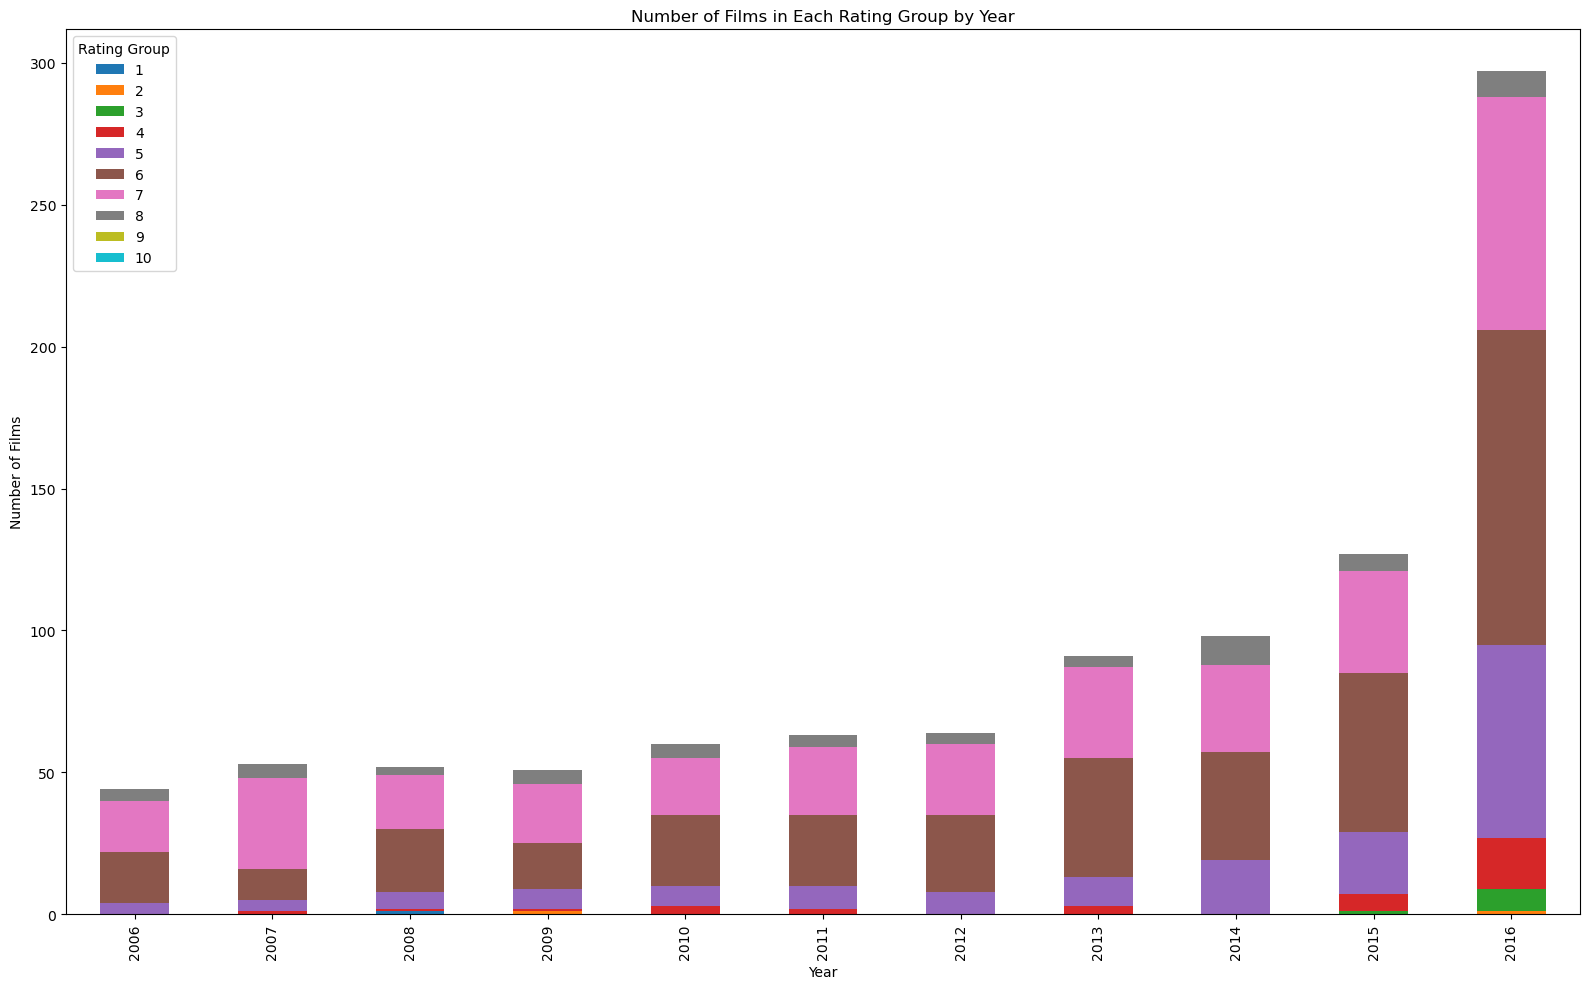

In [115]:
# Create a new column called rating_group
# Use to pd.cut() to bin(group) the rating_group column values by integer intervals 1-10
data["Rating Group"] = pd.cut(data["Rating"], bins=range(1, 12), labels=[str(i) for i in range(1, 11)])

# Grouping by "Year" and "Rating Group", and counting the number of films in each combination
film_counts = data.groupby(["Year", "Rating Group"])["Title"].count().reset_index()

# Pivoting the data for easier plotting
film_counts_pivoted = film_counts.pivot(index="Year", columns="Rating Group", values="Title")

# Plotting the stacked bar plot
film_counts_pivoted.plot(kind="bar", stacked=True, figsize=(16, 10))

plt.title("Number of Films in Each Rating Group by Year")
plt.xlabel("Year")
plt.ylabel("Number of Films")

plt.legend(title="Rating Group")
plt.tight_layout() # Adjust layout to prevent cut-off
plt.show()

In [193]:
# Make a chart to show the number of films in each rating group per year


Each year, which rating range(s) is the most concentrated? Does this match your results from the box and scatter plots above?